# PyTutorial 2.6 - Creating plots with Matplotlib (Part 2)

In the previous tutorial, we went over the basic plotting tools and options.  
In this tutorial, we'll cover how to display several subplots in one figure, as well as additional figure customizations.  

Before going through this tutorial, visit the following link to learn about the anatomy of a figure:  
https://matplotlib.org/devdocs/tutorials/introductory/quick_start.html#parts-of-a-figure

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')

Matplotlib graphs data on objects called 'Figures', each of which can contain one or more 'Axes'.  
An axis is an area where points can be specified in terms of x-y coordinates (for example, using the plot() method of pyplot).  
A single axis can contain several overlayed plots, as we saw in the previous Matplotlib tutorial.  
The simplest way to create a figure is to use the 'subplots()' method.  

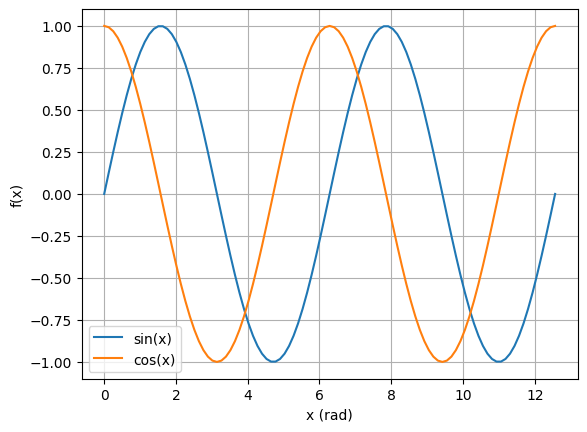

In [2]:
# To create an empty figure with a single axis:
fig, axs = plt.subplots()

# Populate the axis with a few plots:
x = np.linspace(0., 4*np.pi, num=101)
axs.plot(x, np.sin(x), label='sin(x)')
axs.plot(x, np.cos(x), label='cos(x)')

# To set the x & y labels on an axis, we must use the 'set_xlabel' and 'set_ylabel' methods:
axs.set_xlabel('x (rad)')
axs.set_ylabel('f(x)')
# Note that plt.xlabel() and plt.ylabel() place labels on the current Figure object, not on a given Axis. 
# In this example, because the figure contains only one axis, plt.xlabel() and plt.ylabel() will also work here.

# To activate the legend and grid lines on this axis:
axs.legend()
axs.grid()

# Show the entire figure:
plt.show()

Figures can be divided into a grid of axes, each of which can contain multiple overlayed plots.  

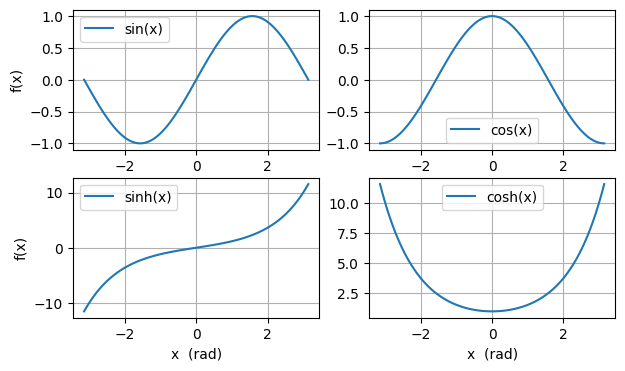

In [3]:
# To create an empty figure with a 4 axes in a 2 x 2 grid with relative dimensions: 7.0 x 4.0 (width x height):
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(7.0,4.0))
# In this case, 'axs' is returned as a 2 x 2 array of Axes objects, where the row & column indices indicate
# the position of the axis within the figure.
# For example, axs[0,0] references the Axis in the top left corner, axs[1,1] the bottom right corner, etc.

# Populate each axis with plots:
x = np.linspace(-np.pi, np.pi, num=101)
axs[0,0].plot(x, np.sin(x), label='sin(x)')
axs[0,1].plot(x, np.cos(x), label='cos(x)')
axs[1,0].plot(x, np.sinh(x), label='sinh(x)')
axs[1,1].plot(x, np.cosh(x), label='cosh(x)')

# Set x-labels on botom row only:
axs[1,0].set_xlabel('x  (rad)')
axs[1,1].set_xlabel('x  (rad)')
# Set y-labels on left column only:
axs[0,0].set_ylabel('f(x)')
axs[1,0].set_ylabel('f(x)')

# To activate the legend and grid lines on all axes:
for row in axs:
	for col in row:
		col.legend()
		col.grid()

plt.show()

To minimize the space between subplots, we can share the x- and y-axis labels between plots and use the 'constrained_layout' option.  

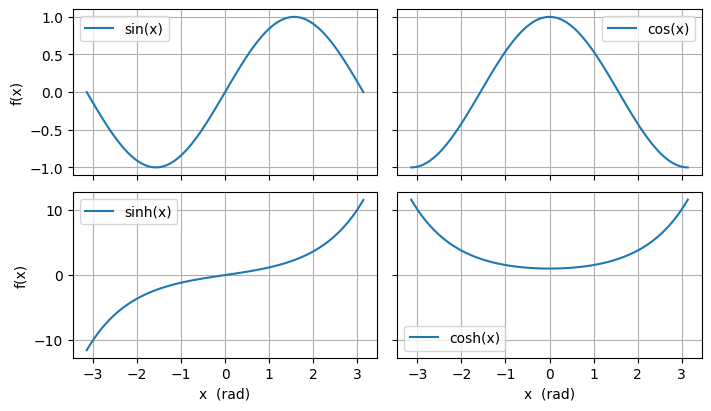

In [12]:
# Here is the same example with x-axis sharing on the columns and y-axis sharing on the rows:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(7.0,4.0), sharex='col', sharey='row', constrained_layout=True)

x = np.linspace(-np.pi, np.pi, num=101)
axs[0,0].plot(x, np.sin(x), label='sin(x)')
axs[0,1].plot(x, np.cos(x), label='cos(x)')
axs[1,0].plot(x, np.sinh(x), label='sinh(x)')
axs[1,1].plot(x, np.cosh(x), label='cosh(x)')

axs[1,0].set_xlabel('x  (rad)')
axs[1,1].set_xlabel('x  (rad)')
axs[0,0].set_ylabel('f(x)')
axs[1,0].set_ylabel('f(x)')

for row in axs:
	for col in row:
		col.legend()
		col.grid()

plt.show()

Alternatively, we can create subplots using the 'add_gridspec' method.  
Internally, the arrangement of a grid of Axes is controlled by creating instances of 'GridSpec' and 'SubplotSpec'.   
GridSpec defines a (possibly non-uniform) grid of cells. Indexing into the GridSpec returns a SubplotSpec that covers one or more grid cells, and can be used to specify the location of an Axes.  

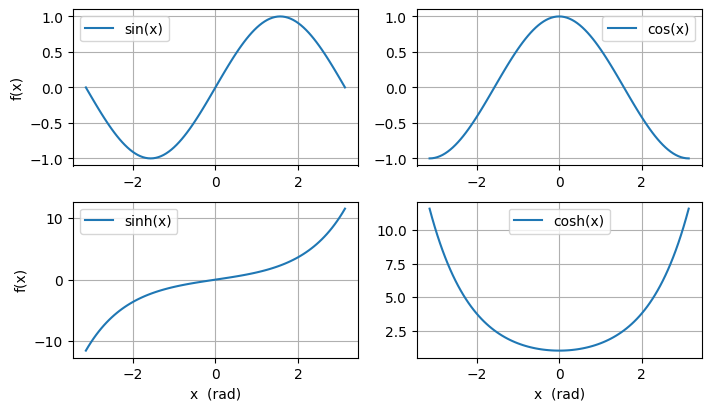

In [8]:
# We can realize a 2 x 2 grid of subplots using 'figure' and 'add_gridspec' as follows.
# Create an empty figure with a constrained layout:
fig = plt.figure(figsize=(7.0, 4.0), constrained_layout=True)
# Specify a grid layout to place subplots within the figure:
gs  = fig.add_gridspec(ncols=2, nrows=2)
# Create a subplot at each grid location:
ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax10 = fig.add_subplot(gs[1,0])
ax11 = fig.add_subplot(gs[1,1])
# Create a 2D numpy array for all figure Axes:
axs = np.array([[ax00, ax01], [ax10, ax11]])

x = np.linspace(-np.pi, np.pi, num=101)
axs[0,0].plot(x, np.sin(x), label='sin(x)')
axs[0,1].plot(x, np.cos(x), label='cos(x)')
axs[1,0].plot(x, np.sinh(x), label='sinh(x)')
axs[1,1].plot(x, np.cosh(x), label='cosh(x)')

axs[1,0].set_xlabel('x  (rad)')
axs[1,1].set_xlabel('x  (rad)')
axs[0,0].set_ylabel('f(x)')
axs[1,0].set_ylabel('f(x)')

for row in axs:
	for col in row:
		col.legend()
		col.grid()

plt.show()

Using 'add_gridspec' instead of the 'subplots' method allows us greater flexibility to create subplots that span multiple grid locations in a non-uniform grid pattern.  

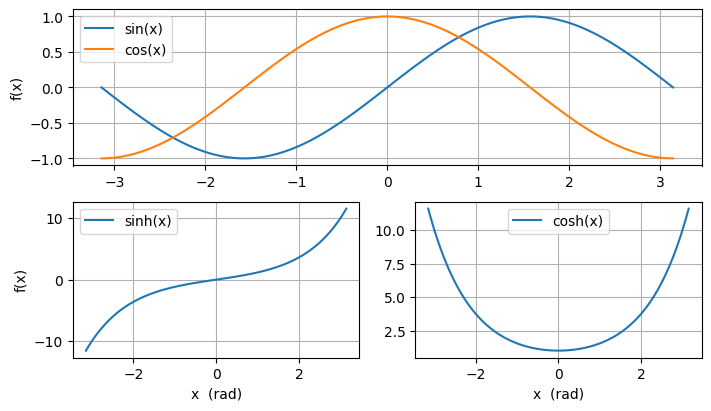

In [11]:
fig = plt.figure(figsize=(7.0, 4.0), constrained_layout=True)
gs  = fig.add_gridspec(ncols=2, nrows=2)
# This time, let the top plot axis spans both columns:
ax0  = fig.add_subplot(gs[0,:])
ax10 = fig.add_subplot(gs[1,0])
ax11 = fig.add_subplot(gs[1,1])
# Create a 1D numpy array for all figure Axes:
axs = np.array([ax0, ax10, ax11])

# Populate each axis with plots:
x = np.linspace(-np.pi, np.pi, num=101)
axs[0].plot(x, np.sin(x), label='sin(x)')
axs[0].plot(x, np.cos(x), label='cos(x)')
axs[1].plot(x, np.sinh(x), label='sinh(x)')
axs[2].plot(x, np.cosh(x), label='cosh(x)')

# Set x-labels on botom row only:
axs[1].set_xlabel('x  (rad)')
axs[2].set_xlabel('x  (rad)')
# Set y-labels on left column only:
axs[0].set_ylabel('f(x)')
axs[1].set_ylabel('f(x)')

for ax in axs:
	ax.legend()
	ax.grid()

# Show the entire figure:
plt.show()